In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
import matplotlib

matplotlib.rcParams['data_path'] = os.path.join(os.path.dirname(matplotlib.__file__), 'mpl-data')
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. 데이터 읽어와서 출력하기

In [3]:
csv_path = "google-stock-dataset-Monthly.csv"
df = pd.read_csv(csv_path)
df

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92
...,...,...,...,...,...,...,...,...
115,115,2022-12-01,101.02,102.25,85.94,88.23,603127800,88.23
116,116,2023-01-01,89.59,100.32,84.86,98.84,672897800,98.84
117,117,2023-02-01,98.71,108.18,88.58,90.06,952580200,90.06
118,118,2023-03-01,89.98,106.59,89.42,103.73,859911400,103.73


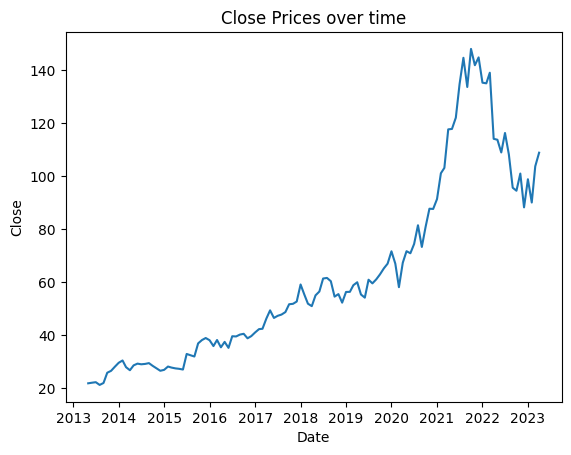

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'])
plt.title('Close Prices over time')
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

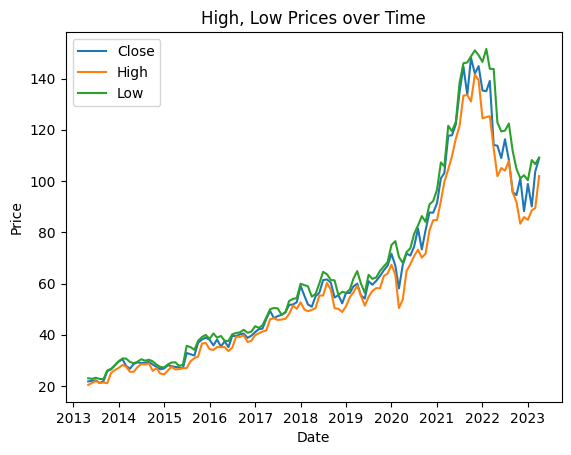

In [11]:
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Low'], label='High')
plt.plot(df['Date'], df['High'], label='Low')

plt.title('High, Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()



21년도 이후만 출력하고 싶다!


### 데이터 가공(2022년 이후 최고, 최저가)

In [12]:
new_df = pd.read_csv(csv_path, usecols=range(1,7))
#2022년 이후 데이터 필터링
df_after_2022 = new_df[new_df['Date'] >= '2022-01-01']
df_after_2022

,Date,Price,High,Low,Close,Volume
104,2022-01-01,145.05,146.49,124.50,135.30,767206000
105,2022-02-01,137.59,151.55,124.95,135.06,928126000
106,2022-03-01,134.88,143.79,125.28,139.07,729162000
107,2022-04-01,139.50,143.71,112.74,114.11,761152000
108,2022-05-01,113.40,122.85,101.88,113.76,850450000
109,2022-06-01,114.86,119.35,105.05,108.96,770754000
110,2022-07-01,107.93,119.68,104.07,116.32,789529700
111,2022-08-01,115.30,122.43,107.80,108.22,515852700
112,2022-09-01,108.28,111.62,95.56,95.65,613278900
113,2022-10-01,96.76,104.82,91.80,94.51,681488300


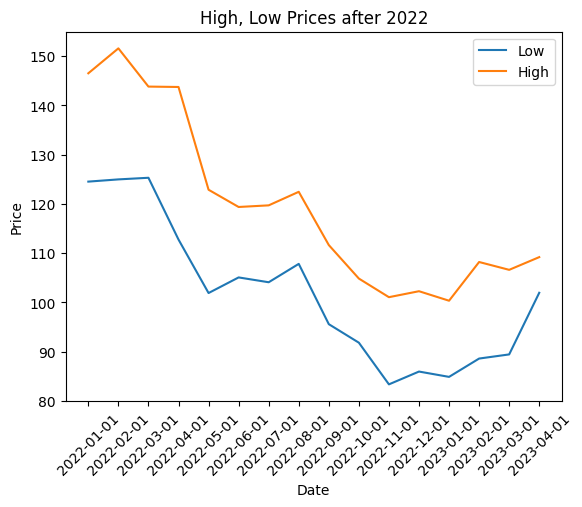

In [ ]:
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label = 'Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label = 'High')

plt.title('High, Low Prices after 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45) #x축 45도 회전
plt.legend()
plt.show()


In [16]:
exchange_rate = 1450
#각 컬럼을 원화로 계산
df['High(won)'] = df['High'] * exchange_rate
df['Low(won)'] = df['Low'] * exchange_rate
df['Close(won)'] = df['Close'] * exchange_rate

df = df[new_df['Date'] >= '2022-01-01']
df


,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close,High(won),Low(won),Close(won)
104,104,2022-01-01,145.05,146.49,124.50,135.30,767206000,135.30,212410.5,180525.0,196185.0
105,105,2022-02-01,137.59,151.55,124.95,135.06,928126000,135.06,219747.5,181177.5,195837.0
106,106,2022-03-01,134.88,143.79,125.28,139.07,729162000,139.07,208495.5,181656.0,201651.5
107,107,2022-04-01,139.50,143.71,112.74,114.11,761152000,114.11,208379.5,163473.0,165459.5
108,108,2022-05-01,113.40,122.85,101.88,113.76,850450000,113.76,178132.5,147726.0,164952.0
109,109,2022-06-01,114.86,119.35,105.05,108.96,770754000,108.96,173057.5,152322.5,157992.0
110,110,2022-07-01,107.93,119.68,104.07,116.32,789529700,116.32,173536.0,150901.5,168664.0
111,111,2022-08-01,115.30,122.43,107.80,108.22,515852700,108.22,177523.5,156310.0,156919.0
112,112,2022-09-01,108.28,111.62,95.56,95.65,613278900,95.65,161849.0,138562.0,138692.5
113,113,2022-10-01,96.76,104.82,91.80,94.51,681488300,94.51,151989.0,133110.0,137039.5


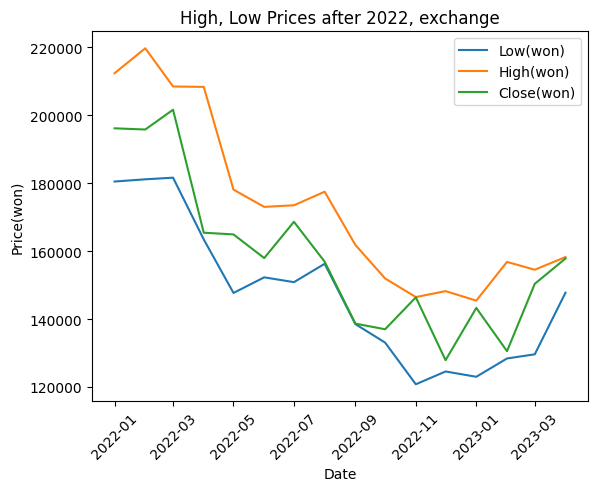

In [18]:
plt.plot(df['Date'], df['Low(won)'], label = 'Low(won)')
plt.plot(df['Date'], df['High(won)'], label = 'High(won)')
plt.plot(df['Date'], df['Close(won)'], label = 'Close(won)')


plt.title('High, Low Prices after 2022, exchange')
plt.xlabel('Date')
plt.ylabel('Price(won)')
plt.xticks(rotation = 45) #x축 45도 회전
plt.legend()
plt.show()

### 간단한 데이터 분석 상관관계

In [23]:
#마지막 1년 + 1개월 데이터 추출
df = df.tail(13)
#마지막 개월의 Close
last_month_close = df['Close'].iloc[-1] #iloc는 행으로 슬라이싱하는것
#마지막 개월을 제외한 1년의 데이터
High_Close = df['High'].iloc[:-1]
Low_Close = df['Low'].iloc[:-1]
volume_Close = df['Volume'].iloc[:-1]
# .corr() 메서드를 사용 : 1에 가까울수록 상관관계가 크다. 0에 가까울수록 상관관계가 없다.
High_Close_corr = High_Close.corr(df['Close'])
Low_Close_corr = Low_Close.corr(df['Close'])
Volume_Close_corr = volume_Close.corr(df['Close'])


print(f'High와 Close의 상관관계 : {High_Close_corr}')
print(f'Low와 Close의 상관관계 : {Low_Close_corr}')
print(f'volume과 Close의 상관관계 : {Low_Close_corr}')

print(f'평균 최고가 : {df['High'].iloc[:-1].mean()}')
print(f'평균 최저가 : {df['Low'].iloc[:-1].mean()}')
print(f'평균 거래량 : {df['Volume'].iloc[:-1].mean()}')







High와 Close의 상관관계 : 0.7467644674963533
Low와 Close의 상관관계 : 0.7784705369457524
평균 최고가 : 113.57
평균 최저가 : 95.92000000000002
